In [23]:
from konlpy.tag import Okt
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
plt.style.use('seaborn')
plt.rc('font', family = 'Malgun Gothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리

##### [과제] 'dataset/영화 기생충_review.txt' 문서를 불러와서 아래 사항을 수행하세요.(20점)
---
- 정규표현식을 이용해서 한글 단어외 삭제 처리 후 정제된 문서에서 명사만 단어 리스트로 도출 및 단어 빈도 분석
- 'dataset/영화 기생충_사전.txt'를 불러와서 포함되어 있는 인덱스를 기준으로 위에서 도출한 명사 단어들의 빈도를 분석하고 막대 그래프로 시각화

In [54]:
with open('../data/영화 기생충_review.txt','r') as file:
    text=file.read()
    
def cleanText(readData):
    text = re.sub('[0-9]+', '', readData)
    text = re.sub('[A-Za-z]+', '', text)
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》]', '', text)
    return text

okt = Okt()
text = cleanText(text)

morph = okt.pos(text)
word_list = []
for word, tag in morph:
    if (tag =='Noun'):
        word_list.append(word)

count = Counter(word_list)
n_words = dict(count.most_common())
print(n_words)

{'영화': 497, '봉준호': 138, '감독': 126, '생각': 122, '기생충': 78, '것': 72, '연기': 66, '그': 65, '보고': 60, '송강호': 60, '현실': 57, '배우': 54, '기대': 54, '작품': 53, '사람': 51, '역시': 48, '이': 48, '더': 47, '최고': 47, '장면': 47, '상': 46, '수': 45, '우리': 44, '봉': 41, '황금종려상': 41, '점': 40, '사회': 37, '시간': 37, '왜': 37, '느낌': 36, '칸': 36, '정말': 35, '스토리': 35, '좀': 34, '냄새': 34, '재미': 32, '나': 31, '부자': 31, '말': 31, '꼭': 29, '볼': 28, '모두': 28, '이선균': 28, '그냥': 27, '가족': 27, '축하': 27, '인간': 27, '듯': 27, '여운': 27, '집': 27, '조여정': 26, '진짜': 25, '다시': 25, '한국': 24, '때': 24, '돈': 24, '몰입': 23, '한번': 23, '임': 22, '함': 22, '또': 22, '이해': 21, '지금': 20, '대한': 19, '장르': 19, '못': 19, '관객': 19, '내용': 19, '마지막': 19, '마음': 18, '수상': 18, '정도': 18, '내내': 18, '부분': 18, '끝': 18, '내': 18, '하나': 18, '관람': 17, '삶': 17, '뭐': 17, '계획': 17, '가지': 17, '저': 17, '기분': 17, '감': 17, '때문': 17, '가슴': 16, '줄': 16, '풍자': 16, '영화제': 16, '살인': 16, '괴물': 16, '속': 16, '이야기': 16, '안': 16, '개봉': 16, '대박': 16, '설국열차': 16, '천재': 15, '개인': 15, '별로': 15, '만'

In [7]:
df_paras = pd.DataFrame([n_words.keys(), n_words.values()], index = ['단어', '횟수']).T
df_paras.set_index('단어', inplace = True)
df_paras.head()

,횟수
단어,
영화,497
봉준호,138
감독,126
생각,122
기생충,78


In [8]:
df2 = pd.read_csv('../data/영화 기생충_사전.txt', encoding = 'cp949', names = ['단어'])
df2['freq2'] = 0
df2.set_index('단어', inplace = True)
df2.head()

,freq2
단어,
기생충,0
봉준호,0
송강호,0
기택,0
이선균,0


,단어,횟수
0,봉준호,138
1,기생충,78
2,송강호,60
3,이선균,28
4,조여정,26
5,최우식,12
6,이정은,11
7,기우,3
8,장혜진,1
9,기정,1


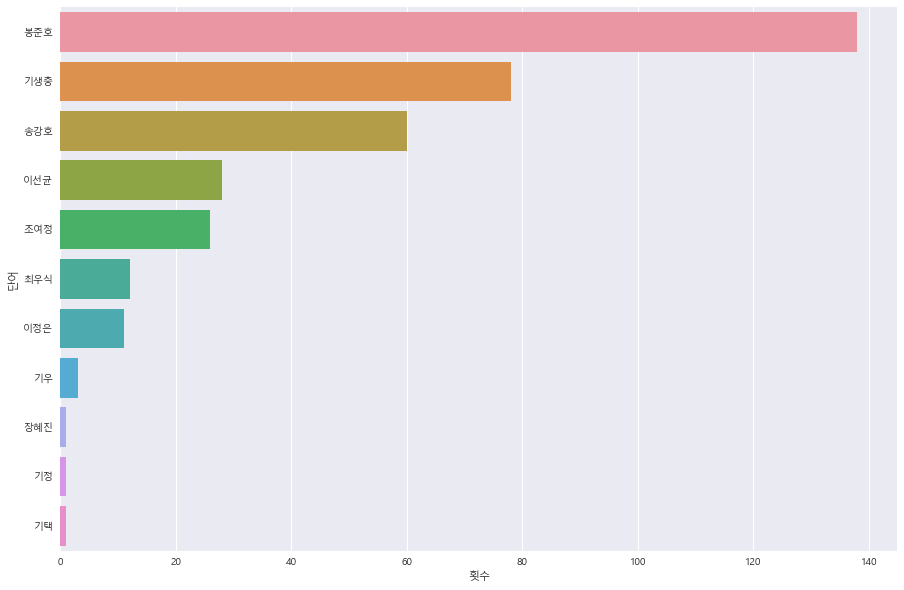

In [9]:
df_paras_re = pd.concat([df_paras, df2], axis = 1, join = 'inner').reset_index().drop('freq2', axis = 1)

display(df_paras_re)
plt.figure(figsize = (15, 10))
sns.barplot(data = df_paras_re, x = '횟수', y = '단어')
plt.show()

##### [과제] 'dataset/영화 기생충_review.txt' 문서를 불러와서 아래 사항을 수행하세요.(10점)
---
- cleanText() 사용자 함수 재활용하여 정제된 문서에서 명사만 단어 리스트로 도출
- 단어 빈도를 도출한 후 워드클라우드로 시각화

In [ ]:
!pip install wordcloud

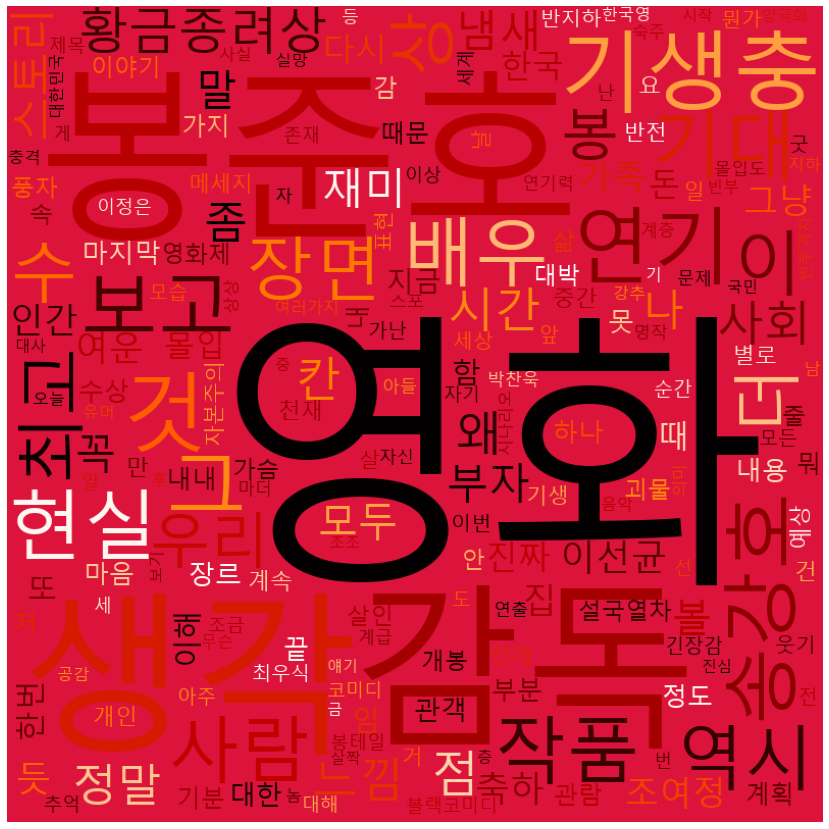

In [78]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'crimson', colormap = 'gist_heat',
                      min_font_size = 7, font_path = '../data/malgun.ttf').generate_from_frequencies(n_words)


plt.figure(figsize = (15, 15))
plt.imshow(wordcloud)
plt.axis('off')
# plt.tight_layout(pad = 0)
plt.show()